In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import precision_score, recall_score, f1_score


from sklearn.metrics import confusion_matrix, classification_report

In [8]:
def load_text_dataset_pandas(dataset_path):
    df = pd.read_csv(dataset_path)

    X = df.iloc[:, 0].to_numpy()
    y = df.iloc[:, 1].to_numpy()

    return X, y

In [9]:
def vectorize_text(X_train, X_test):
    """Vectorizes a training and a test set via term frequency - inverse document frequency 
    (TF-IDF). The function receives two lists of strings, X_train and X_test, that contain 
    the text data for each sample in the training and test set, respectively. The function
    trains the b procedure (using the sklearn default arguments!), applies it to the
    data and returns V_train and V_test, which contains the vectorized data for the training
    and test set, respectively."""
    
    # TODO
    # train tf-idf vectorizer
        # HINT: On which data sets should the IDF be calculated
        # to prevent data leakage?
    # transform X_train
    # transform X_test
    # return them
    tfidf_vectorizer = TfidfVectorizer()  

    V_train = tfidf_vectorizer.fit_transform(X_train)
    V_test = tfidf_vectorizer.transform(X_test)


    return V_train, V_test


In [10]:
def fit_classifier_and_predict(V_train, y_train, V_test):
    """Fits a naive bayes classifier to the already vectorized data. The function takes two
    design matrices V_train and V_test and the true labels belonging to the data points in 
    V_train. The function fits a naive bayes classifier to the training data and predicts
    the labels of the test data. The function returns the trained classifier and the predicted
    labels on the test data."""

    # TODO:
    # Fit a Naive Bayes Classiﬁer
    # Make a prediction of the text text

    mnb = MultinomialNB()
    classifier = mnb.fit(V_train, y_train)  # Works directly with sparse matrices
    y_pred = classifier.predict(V_test)
    
    return classifier, y_pred

In [11]:
def calculate_confusion_matrix(y_true, y_pred, pos_label=1, neg_label=0):
    """Calculates the confusion matrix between the true labels y_true
    and the predicted labels y_pred of an array. For this it needs to
    know the label of the positive class pos_class.
    The function assumes that there are only 2 classes.
    Returns the true positive, false positive, false negative and
    true negative values as floats or numpy values in this specific
    order."""

    # TODO
    # calculate the confusion matrix given the true and predicted labels
    # if possible, use vectorized operations and numpy internal functions
    # Remember, you may not use scikit-learn

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate true positives, false positives, false negatives, and true negatives
    true_pos = np.sum((y_true == pos_label) & (y_pred == pos_label))
    false_pos = np.sum((y_true == neg_label) & (y_pred == pos_label))
    false_neg = np.sum((y_true == pos_label) & (y_pred == neg_label))
    true_neg = np.sum((y_true == neg_label) & (y_pred == neg_label))


    # cm = confusion_matrix(y_true, y_pred, labels=[pos_label, neg_label])
    
    # # Extract values: TP, FP, FN, TN
    # true_pos = cm[0, 0]
    # false_pos = cm[1, 0]
    # false_neg = cm[0, 1]
    # true_neg = cm[1, 1]

    return true_pos, false_pos, false_neg, true_neg

In [25]:
def calculate_confusion_matrix(y_true, y_pred, pos_label=1, neg_label=0):
    """Calculate confusion matrix values: TP, FP, FN, TN."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[neg_label, pos_label]).ravel()
    return tp, fp, fn, tn

# Plot confusion matrix
def plot_confusion_matrix(true_pos, false_pos, false_neg, true_neg, pos_label=1, neg_label=0):
    """Plots the confusion matrix with labeled axes."""
    confusion_mat = np.array([[true_neg, false_pos], [false_neg, true_pos]])

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(
        confusion_mat,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=[f"Predicted {neg_label}", f"Predicted {pos_label}"],
        yticklabels=[f"Actual {neg_label}", f"Actual {pos_label}"]
    )
    ax.set_xlabel("Prediction", fontsize=14)
    ax.set_ylabel("Truth", fontsize=14)
    ax.set_title("Confusion Matrix", fontsize=16)
    plt.show()


#### 20newsgroups dataset - multiclass classification

In [26]:
# Load data
X, y = load_text_dataset_pandas('./20newsgroups.csv')
# create a hold out test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# vectorize the data
V_train, V_test = vectorize_text(X_train, X_test)
# fit a classifier
classifier, y_pred = fit_classifier_and_predict(V_train, y_train, V_test)
# compute the accuracy


precision = precision_score(y_test, y_pred, average='macro')  # oder 'micro', 'weighted', je nach Bedarf
recall = recall_score(y_test, y_pred, average='macro')  # oder 'micro', 'weighted', je nach Bedarf

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.8621
Recall: 0.7934


#### Spam - No spam

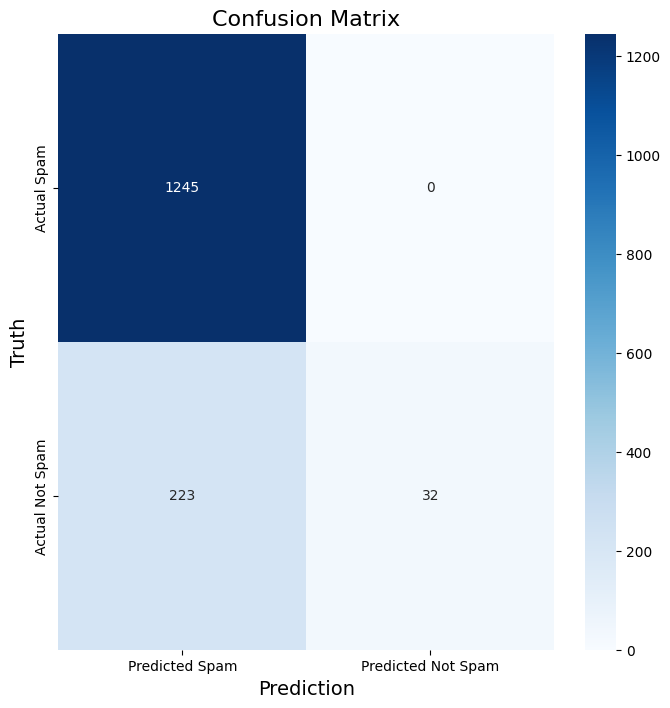

Precision (positive class): 1.0000
Recall (positive class): 0.1255
F1 Score (positive class): 0.2230
Precision (negative class): 0.8481
Recall (negative class): 1.0000
F1 Score (negative class): 0.9178


In [34]:
# Load data
X, y = load_text_dataset_pandas('./spam_or_not_spam.csv')

# create a hold out test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# vectorize the data
V_train, V_test = vectorize_text(X_train, X_test)

# fit a classifier
classifier, y_pred = fit_classifier_and_predict(V_train, y_train, V_test)

# calculate the confusion matrix
# Check if y_test is a NumPy array of strings
if isinstance(y_test[0], str):
    label_mapping = {'Not spam': 0, 'Spam': 1}  # Adjust based on your dataset's labels
    y_test = np.array([label_mapping[label] for label in y_test])  # Convert to integers
    y_pred = np.array([label_mapping[label] for label in y_pred])  # Ensure consistency

true_pos, false_pos, false_neg, true_neg = calculate_confusion_matrix(y_test, y_pred, pos_label=1, neg_label=0)

# Plot confusion matrix
plot_confusion_matrix(true_pos, false_pos, false_neg, true_neg, pos_label="Not Spam", neg_label="Spam")

# Compute metrics
precision_pos = true_pos / (true_pos + false_pos) if (true_pos + false_pos) != 0 else 0
recall_pos = true_pos / (true_pos + false_neg) if (true_pos + false_neg) != 0 else 0
f1_pos = 2 * (precision_pos * recall_pos) / (precision_pos + recall_pos) if (precision_pos + recall_pos) != 0 else 0

precision_neg = true_neg / (true_neg + false_neg) if (true_neg + false_neg) != 0 else 0
recall_neg = true_neg / (true_neg + false_pos) if (true_neg + false_pos) != 0 else 0
f1_neg = 2 * (precision_neg * recall_neg) / (precision_neg + recall_neg) if (precision_neg + recall_neg) != 0 else 0

# Print metrics
print(f"Precision (positive class): {precision_pos:.4f}")
print(f"Recall (positive class): {recall_pos:.4f}")
print(f"F1 Score (positive class): {f1_pos:.4f}")
print(f"Precision (negative class): {precision_neg:.4f}")
print(f"Recall (negative class): {recall_neg:.4f}")
print(f"F1 Score (negative class): {f1_neg:.4f}")

# Print classification report for reference
#print(classification_report(y_test, y_pred))

